<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 20px; text-align: left; line-height: 1.5;">
    Universidade Federal da Bahia (UFBA)
    <br>
    Departamento de Engenharia Elétrica e da Computação (DEEC)
    <br>
    Disciplina: ENGG64 - Visão Computacional
    <br>
    Docente: André Gustavo Scolari Conceição
    <br>
    Discente: Gabriel Correia
</div>


---

ED9 - MOMENTOS

Resultados Obtidos no Programa: 


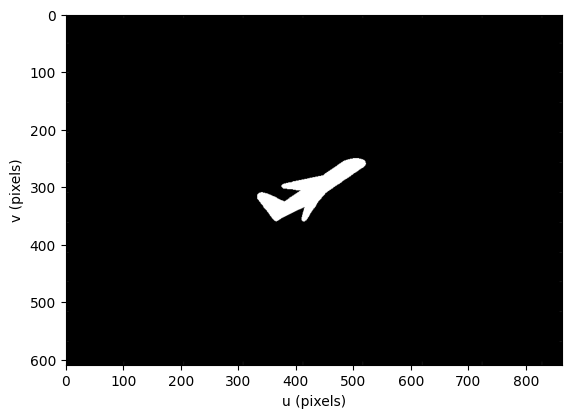

O centroide da imagem é: [422.0264897466827, 306.37547483953597]

 A matriz de covariância da imagem é:
[[ 4.60245077e+09 -1.68335064e+09]
 [-1.68335064e+09  1.66304896e+09]]

 O momento central da imagem é: 625020093

 A orientação da imagem é: -24.438208839189375


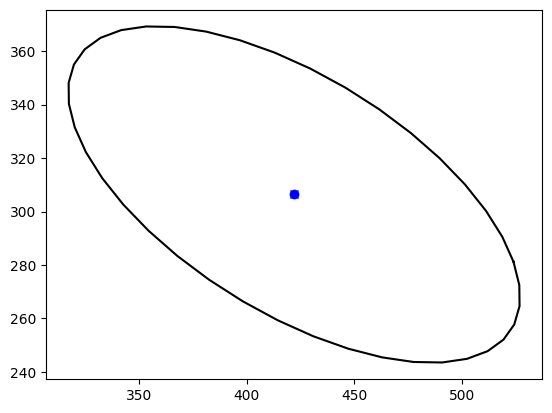

In [31]:
import numpy as np
from machinevisiontoolbox import *
from spatialmath.base import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.close('all')
print('Resultados Obtidos no Programa: ')

### Criando um módulo para leitura da imagem
def read_image(file_path):
    return Image.Read(file_path)

### Criando um módulo para calcular a área da imagem
def calculate_area(image):
    return image.sum()

### Criando um módulo para calcular os momentos e centróides da imagem
def calculate_moments_and_centroid(image):
    m00 = image.mpq(0, 0)
    m01 = image.mpq(0, 1)
    m10 = image.mpq(1, 0)
    m11 = image.mpq(1, 1)
    m20 = image.mpq(2, 0)
    m02 = image.mpq(0, 2)
    uc = m10 / m00
    vc = m01 / m00
    return m00, m01, m10, m11, m20, m02, uc, vc

### Criando um módulo para obtenção dos termos da matriz de covariância
def calculate_covariance_matrix(image):
    u20 = image.upq(2, 0)
    u02 = image.upq(0, 2)
    u11 = image.upq(1, 1)
    return np.array([[u20, u11], [u11, u02]])

### Criando um módulo para cálculos de orientação da imagem
def calculate_orientation(covariance_matrix):
    lmbda, x = np.linalg.eig(covariance_matrix)
    i = np.argmax(lmbda)
    v = x[:, i]
    return np.rad2deg(np.arctan2(v[1], v[0]))

### Criando o módulo com a Função Principal do código
def main():

    # Leitura da imagem aviao_ed.png
    image_path = "aviao_ed.png"
    aviao = read_image(image_path)

    # Plotando a imagem
    aviao.disp()

    # Calculando a área
    area = calculate_area(aviao)

    # Calculando momentos e centroide
    m00, m01, m10, m11, m20, m02, uc, vc = calculate_moments_and_centroid(aviao)

    # Plotando o ponto representando o centroide
    plot_point((uc, vc), ["bo", "bx"])

    # Calculando os termos da matriz de covariância
    covariance_matrix = calculate_covariance_matrix(aviao)

    # Plotando a elipse
    plot_ellipse(4 * covariance_matrix / m00, centre=(uc, vc), inverted=True, color="black")

    # Calculando orientação
    angle = calculate_orientation(covariance_matrix)

    # Exibindo os resultados
    print('O centroide da imagem é:', [uc, vc])
    print("\n A matriz de covariância da imagem é:")
    print(covariance_matrix)
    print('\n O momento central da imagem é:', m11)
    print('\n A orientação da imagem é:', angle)

    plt.show()

if __name__ == "__main__":
    main()
